33402 13068
(68, 171, 3) (27, 61, 3) (25, 56, 3) (97, 205, 3) (67, 149, 3) (105, 209, 3) (154, 305, 3) (110, 167, 3) (49, 120, 3) (34, 80, 3) (40, 79, 3) (28, 70, 3) (81, 174, 3) (62, 127, 3) (38, 72, 3) (82, 231, 3) (14, 47, 3) (41, 75, 3) (25, 56, 3) (54, 129, 3) 

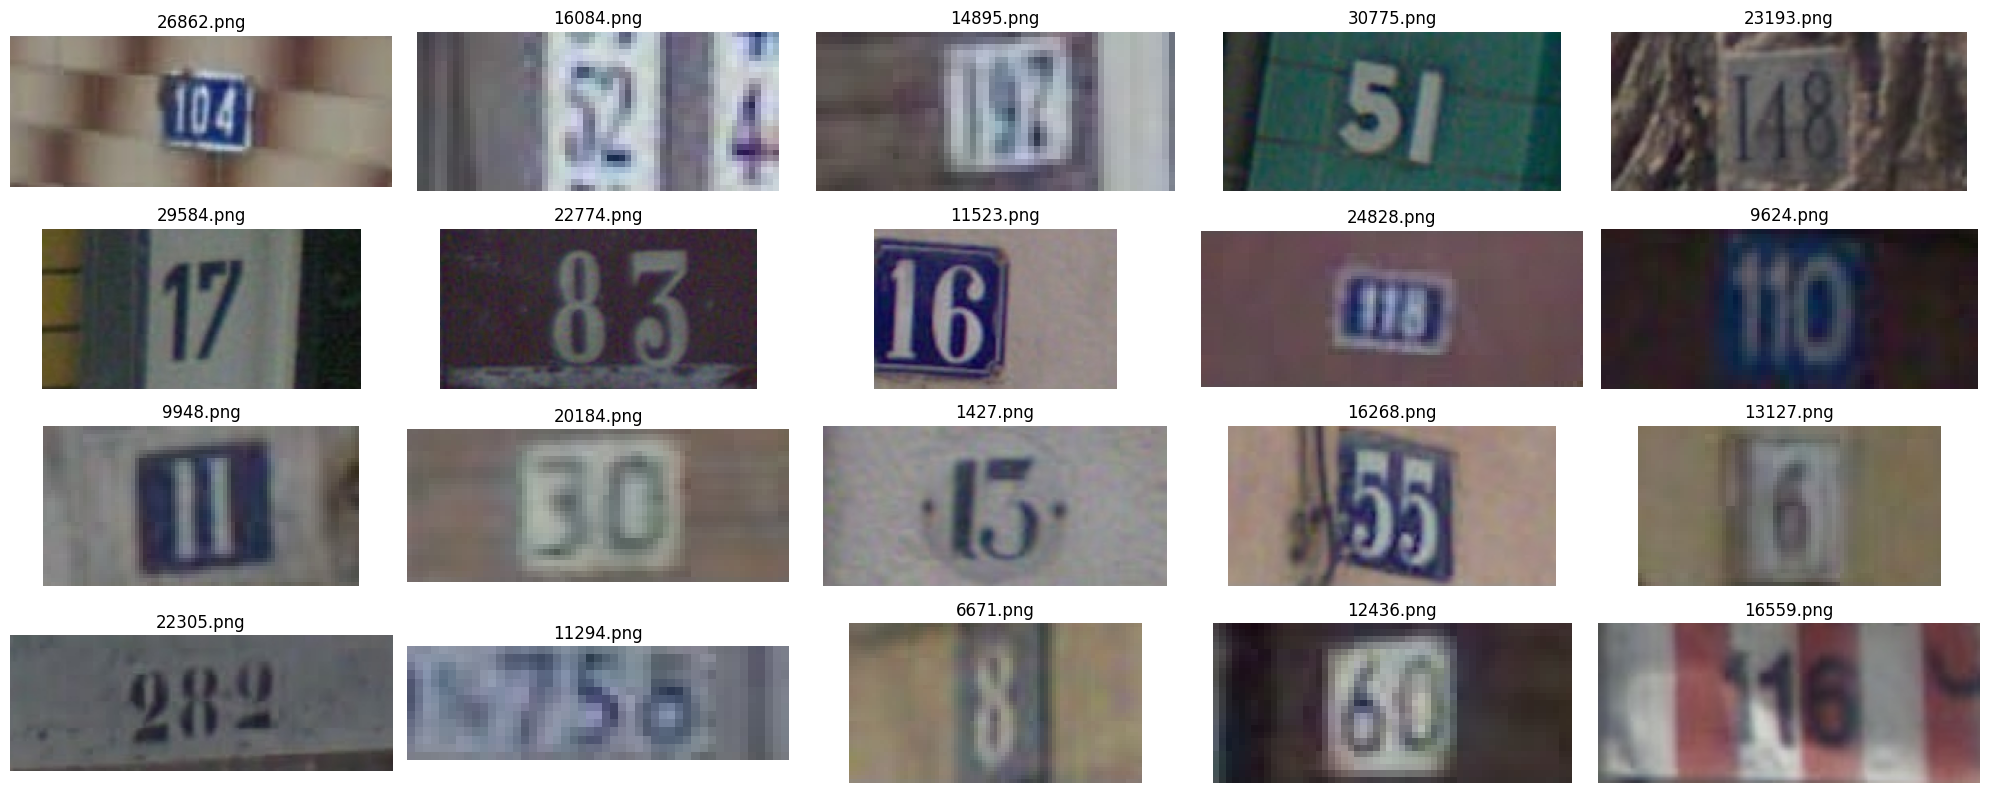

In [1]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


base_train_data_path = 'data/train'
base_test_data_path = 'data/test'

# 获取当前目录下所有的 PNG 文件
train_files = [f for f in os.listdir(base_train_data_path) if f.endswith('.png')]
test_files = [f for f in os.listdir(base_test_data_path) if f.endswith('.png')]
print(len(train_files), len(test_files))


files = train_files + test_files

# 随机选取 10 张图片
selected_files = random.sample(files, 20)

# 创建一个图形和子图
fig, axes = plt.subplots(4, 5, figsize=(20, 8))  # 根据需要调整大小和布局
axes = axes.flatten()

# 循环遍历选定的文件
for ax, file in zip(axes, selected_files):
    
    file_path = os.path.join(base_train_data_path, file)
    
    # 打开图片并转换为 numpy 数组
    img = np.array(Image.open(file_path))

    # 显示图片的大小
    print(img.shape, end=" ")
    
    # 在子图上显示图片
    ax.imshow(img)
    ax.set_title(file)
    ax.axis('off')  # 关闭坐标轴

# 显示所有图片
plt.tight_layout()
plt.show()


In [2]:
import h5py

# 打开文件
def test_load_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # 获取图片名和边界框的引用
        names = f['digitStruct/name']
        bboxes = f['digitStruct/bbox']

        # 循环处理前5个图片
        for i in random.sample(range(len(names)), 5):
            # 解引用获取图片名
            name = ''.join(chr(c[0]) for c in f[names[i][0]])
            print(f'Image name: {name}')

            # 获取当前图片的边界框信息
            bbox = bboxes[i][0]
            height = [f[f[bbox]['height'][j][0]][()].item() if f[bbox]['height'].shape[0] != 1 else f[bbox]['height'][0][0].item()  for j in range(f[bbox]['height'].shape[0])]
            label =  [f[f[bbox]['label'][j][0]][()].item()  if f[bbox]['label'].shape[0] != 1  else f[bbox]['label'][0][0].item()   for j in range(f[bbox]['label'].shape[0])]
            left =   [f[f[bbox]['left'][j][0]][()].item()   if f[bbox]['left'].shape[0] != 1   else f[bbox]['left'][0][0].item()    for j in range(f[bbox]['left'].shape[0])]
            top =    [f[f[bbox]['top'][j][0]][()].item()    if f[bbox]['top'].shape[0] != 1    else f[bbox]['top'][0][0].item()     for j in range(f[bbox]['top'].shape[0])]
            width =  [f[f[bbox]['width'][j][0]][()].item()  if f[bbox]['width'].shape[0] != 1  else f[bbox]['width'][0][0].item()   for j in range(f[bbox]['width'].shape[0])]

            # 打印边界框信息
            print(f"Height: {height}, Label: {label}, Left: {left}, Top: {top}, Width: {width}")

test_load_data(os.path.join(base_train_data_path, "digitStruct.mat"))

Image name: 16057.png
Height: [31.0, 31.0, 31.0], Label: [2.0, 8.0, 5.0], Left: [89.0, 106.0, 120.0], Top: [20.0, 18.0, 19.0], Width: [20.0, 19.0, 15.0]
Image name: 26800.png
Height: [35.0, 35.0], Label: [3.0, 7.0], Left: [31.0, 50.0], Top: [6.0, 2.0], Width: [21.0, 19.0]
Image name: 28603.png
Height: [44.0, 44.0], Label: [2.0, 2.0], Left: [53.0, 85.0], Top: [14.0, 14.0], Width: [31.0, 30.0]
Image name: 28329.png
Height: [20.0, 20.0], Label: [3.0, 3.0], Left: [114.0, 124.0], Top: [29.0, 31.0], Width: [11.0, 11.0]
Image name: 12244.png
Height: [22.0], Label: [6.0], Left: [26.0], Top: [6.0], Width: [10.0]


In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


base_train_data_path = 'data/train'
base_test_data_path = 'data/test'

train_files = [f for f in os.listdir(base_train_data_path) if f.endswith('.png')]
test_files = [f for f in os.listdir(base_test_data_path) if f.endswith('.png')]

train_images = [np.array(Image.open(os.path.join(base_train_data_path, file))) for file in train_files]
test_images = [np.array(Image.open(os.path.join(base_test_data_path, file))) for file in test_files]

In [4]:
# 测试是否加载数据
print(len(train_files), len(test_files))
print(train_files[0], test_files[0])

print(len(train_images), len(test_images))
print(train_images[0].shape, test_images[0].shape)

33402 13068
1.png 1.png
33402 13068
(350, 741, 3) (47, 99, 3)


In [4]:
import h5py

train_images_info = []
test_images_info = []

# 打开文件
def load_data(file_path):
    with h5py.File(file_path, 'r') as f:
        # 获取图片名和边界框的引用
        names = f['digitStruct/name']
        bboxes = f['digitStruct/bbox']

        # 循环处理前5个图片
        for i in range(len(names)):
            image_info = dict()

            # 解引用获取图片名
            name = ''.join(chr(c[0]) for c in f[names[i][0]])

            # 获取当前图片的边界框信息
            bbox = bboxes[i][0]
            height = [f[f[bbox]['height'][j][0]][()].item() if f[bbox]['height'].shape[0] != 1 else f[bbox]['height'][0][0].item()  for j in range(f[bbox]['height'].shape[0])]
            label =  [f[f[bbox]['label'][j][0]][()].item()  if f[bbox]['label'].shape[0] != 1  else f[bbox]['label'][0][0].item()   for j in range(f[bbox]['label'].shape[0])]
            left =   [f[f[bbox]['left'][j][0]][()].item()   if f[bbox]['left'].shape[0] != 1   else f[bbox]['left'][0][0].item()    for j in range(f[bbox]['left'].shape[0])]
            top =    [f[f[bbox]['top'][j][0]][()].item()    if f[bbox]['top'].shape[0] != 1    else f[bbox]['top'][0][0].item()     for j in range(f[bbox]['top'].shape[0])]
            width =  [f[f[bbox]['width'][j][0]][()].item()  if f[bbox]['width'].shape[0] != 1  else f[bbox]['width'][0][0].item()   for j in range(f[bbox]['width'].shape[0])]


            image_info['name'] = name
            image_info['height'] = height
            image_info['label'] = label
            image_info['left'] = left
            image_info['top'] = top
            image_info['width'] = width

            if file_path == os.path.join(base_train_data_path, "digitStruct.mat"):
                train_images_info.append(image_info)
            else:
                test_images_info.append(image_info)


load_data(os.path.join(base_train_data_path, "digitStruct.mat"))
load_data(os.path.join(base_test_data_path, "digitStruct.mat"))

In [6]:
print(len(train_images_info), len(test_images_info))
print(train_images_info[0])
print(test_images_info[0])

33402 13068
{'name': '1.png', 'height': [219.0, 219.0], 'label': [1.0, 9.0], 'left': [246.0, 323.0], 'top': [77.0, 81.0], 'width': [81.0, 96.0]}
{'name': '1.png', 'height': [30.0], 'label': [5.0], 'left': [43.0], 'top': [7.0], 'width': [19.0]}


In [32]:
d = dict()  
for i in range(len(train_images_info)):
    d[train_images_info[i]['name']] = {
        'height': [int(i) for i in train_images_info[i]['height']],
        'label': [int(i) if i != 10 else 0 for i in train_images_info[i]['label']],
        'left': [int(i) for i in train_images_info[i]['left']],
        'top': [int(i) for i in train_images_info[i]['top']],
        'width': [int(i) for i in train_images_info[i]['width']]
    }

import json

with open('train.json', 'w') as f:
    json.dump(d, f)

d = dict()
for i in range(len(test_images_info)):
    d[test_images_info[i]['name']] = {
        'height': [int(i) for i in test_images_info[i]['height']],
        'label': [int(i) if i != 10 else 0 for i in test_images_info[i]['label']],
        'left': [int(i) for i in test_images_info[i]['left']],
        'top': [int(i) for i in test_images_info[i]['top']],
        'width': [int(i) for i in test_images_info[i]['width']]
    }
with open('test.json', 'w') as f:
    json.dump(d, f)

In [41]:
with open('train.json', 'r') as f:
    train_data = json.load(f)
with open('test.json', 'r') as f:
    test_data = json.load(f)

print(len(train_data), len(test_data))
print(test_data['2.png'])
print(train_data['25.png'])

33402 13068
{'height': [23, 23, 23], 'label': [2, 1, 0], 'left': [99, 114, 121], 'top': [5, 8, 6], 'width': [14, 8, 12]}
{'height': [50, 50, 50], 'label': [6, 0, 1], 'left': [60, 87, 113], 'top': [11, 9, 7], 'width': [24, 24, 21]}


In [1]:
import json
import cv2
import os

train_json = json.load(open('train.json'))
img_path = "./data/train"
label_path = "./data/train_labels"

for x in train_json:
  field = x.split('.')[-2]+'.txt'  #文件后缀名
  #print(field)
  img = cv2.imread(os.path.join(img_path,x))
  #获取图片长度
  img_h,img_w = img.shape[:2]

  length = len(train_json[x]['height']) 
  json_data = train_json[x]
  for i in range(length):
    h = json_data['height'][i]
    label = json_data['label'][i]
    w = json_data['width'][i]
    x = json_data['left'][i]
    y = json_data['top'][i]

    x = (x + w / 2) / img_w
    y = (y + h / 2) / img_h
    w = w / img_w
    h = h / img_h

    fp = open(os.path.join(label_path,field), mode="a+", encoding="utf-8")  
    file_str = str(label) + ' ' + str(round(x, 6)) + ' ' + str(round(y, 6)) + ' ' + str(round(w, 6)) + ' ' + str(round(h, 6))  
    fp.write(file_str+'\n')  

  fp.close()

test_json = json.load(open('test.json'))
img_path = "./data/test"
label_path = "./data/test_labels"

for x in test_json:
  field = x.split('.')[-2]+'.txt'  
  #print(field)
  img = cv2.imread(os.path.join(img_path,x))
  #获取图片长度
  img_h,img_w = img.shape[:2]

  length = len(test_json[x]['height']) 
  json_data = test_json[x]
  for i in range(length):
    h = json_data['height'][i]
    label = json_data['label'][i]
    w = json_data['width'][i]
    x = json_data['left'][i]
    y = json_data['top'][i]

    x = (x + w / 2) / img_w
    y = (y + h / 2) / img_h
    w = w / img_w
    h = h / img_h

    fp = open(os.path.join(label_path,field), mode="a+", encoding="utf-8")  
    file_str = str(label) + ' ' + str(round(x, 6)) + ' ' + str(round(y, 6)) + ' ' + str(round(w, 6)) + ' ' + str(round(h, 6))  
    fp.write(file_str+'\n')  

  fp.close()

In [2]:
import torch
import numpy as np
import cv2

label_path = './data/test_labels/2.txt'
image_path = './data/test/2.png'

# 坐标转换，原始存储的是 YOLOv5 格式
# Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
def xywhn2xyxy(x, w=640, h=640, padw=0, padh=0):

    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = w * (x[:, 0] - x[:, 2] / 2) + padw  # top left x
    y[:, 1] = h * (x[:, 1] - x[:, 3] / 2) + padh  # top left y
    y[:, 2] = w * (x[:, 0] + x[:, 2] / 2) + padw  # bottom right x
    y[:, 3] = h * (x[:, 1] + x[:, 3] / 2) + padh  # bottom right y
    return y

# 读取 labels
with open(label_path, 'r') as f:
    lb = np.array([x.split() for x in f.read().strip().splitlines()], dtype=np.float32)  # labels


# 读取图像文件
img = cv2.imread(str(image_path))
h, w = img.shape[:2]
lb[:, 1:] = xywhn2xyxy(lb[:, 1:], w, h, 0, 0) #反归一化

print(lb)
# 绘图
for _, x in enumerate(lb):
    class_label = int(x[0])  # class

    cv2.rectangle(img,(round(x[1]),round(x[2])),(round(x[3]),round(x[4])),(0, 255, 0) )
    cv2.putText(img,str(class_label), (int(x[1]), int(x[2] - 2)),fontFace = cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,color=(0, 0, 255),thickness=2)

cv2.imwrite('./data/check/test.jpg',img)

[[  2.         99.000084    4.9999914 113.00008    28.000008 ]
 [  1.        114.00007     7.9999914 122.00007    31.000008 ]
 [  0.        120.99997     5.999975  132.99997    28.999992 ]]


True

In [7]:
import pickle

with open('data/train_images.pkl', 'wb') as f:
    pickle.dump(train_images, f)
with open('data/test_images.pkl', 'wb') as f:
    pickle.dump(test_images, f)

with open('data/train_images.pkl', 'rb') as f:
    train_images = pickle.load(f)
with open('data/test_images.pkl', 'rb') as f:
    test_images = pickle.load(f)

print(len(train_images), len(test_images))
print(train_images[0].shape, test_images[0].shape)

33402 13068
(350, 741, 3) (47, 99, 3)


In [8]:
with open('data/train_images_info.pkl', 'wb') as f:
    pickle.dump(train_images_info, f)
with open('data/test_images_info.pkl', 'wb') as f:
    pickle.dump(test_images_info, f)

with open('data/train_images_info.pkl', 'rb') as f:
    train_images_info = pickle.load(f)
with open('data/test_images_info.pkl', 'rb') as f:
    test_images_info = pickle.load(f)

print(len(train_images_info), len(test_images_info))
print(train_images_info[1])
print(test_images_info[1])

33402 13068
{'name': '2.png', 'height': [32.0, 32.0], 'label': [2.0, 3.0], 'left': [77.0, 98.0], 'top': [29.0, 25.0], 'width': [23.0, 26.0]}
{'name': '2.png', 'height': [23.0, 23.0, 23.0], 'label': [2.0, 1.0, 10.0], 'left': [99.0, 114.0, 121.0], 'top': [5.0, 8.0, 6.0], 'width': [14.0, 8.0, 12.0]}
